# ML - Assigmnent 2
## Author: Benjamin Brodwolf

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_format = "retina"

## Task 1

In [2]:
np.random.seed(42) # entferne diese Zeile, und die Daten sind immer random

def generate_dataset(mu, sigma, amount_of_datapoints, label_name):
    x1 = np.random.normal(mu[0], sigma[0], amount_of_datapoints) 
    x2 = np.random.normal(mu[1], sigma[1], amount_of_datapoints) 
    
    X = []
    label = []
    for i in range(amount_of_datapoints):
        X.append([x1[i], x2[i]])
        label.append(label_name)
        
    return np.array(X), np.array(label)

In [3]:
datapoints = 50

mu1        = [-4.0 , 1.0]
sigma1     = [ 1.2 , 0.8]
x1, label1 = generate_dataset(mu1, sigma1, datapoints, 0)


mu2        = [2.0 , 3.0]
sigma2     = [0.7 , 1.0]
x2, label2 = generate_dataset(mu2, sigma2, datapoints, 1)

In [4]:
X      = np.concatenate((x1, x2), axis=0)
labels = np.concatenate((label1, label2), axis=0)
X.shape, labels.shape

((100, 2), (100,))

In [5]:
d = {"x1": X[:,0], "x2": X[:,1], "label": labels}
df = pd.DataFrame(data=d)
df

x1        x2  label
0  -3.403943  1.259267      0
1  -4.165917  0.691934      0
2  -3.222774  0.458462      0
3  -2.172364  1.489341      0
4  -4.280984  1.824800      0
..       ...       ...    ...
95  2.547276  3.385317      1
96  1.134135  2.116143      1
97  1.075680  3.153725      1
98  2.365359  3.058209      1
99  2.207889  1.857030      1

[100 rows x 3 columns]

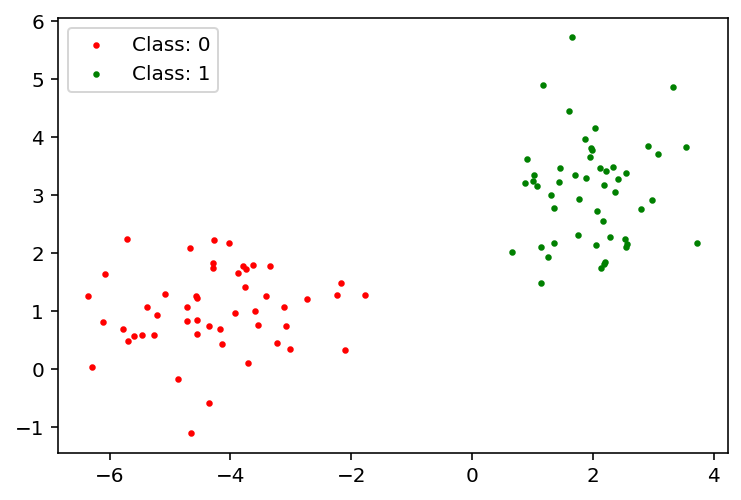

In [6]:
plt.scatter(df.x1[df.label == 0], df.x2[df.label == 0], color = "red", label="Class: 0", s=5) 
plt.scatter(df.x1[df.label == 1], df.x2[df.label == 1], color = "green", label="Class: 1", s=5) 
plt.legend()
plt.show() 

The gradient descent has hit the points perfectly.  A 100% accuracy was achieved, after 10 iterations and a learning rate of 1 and without regularisation. 
The cost minimization also has a nice curved shape and tends to a good minimum.

## Task 2

In [7]:
df_task2 = df.sample(frac=1).reset_index(drop=True)
df_task2.head()

x1        x2  label
0  2.129244  1.754261      1
1 -4.720766  1.073409      0
2  2.282836  2.285649      1
3 -4.722048  0.824262      0
4  0.914536  3.625667      1

In [8]:
X  = df_task2.drop("label", axis=1)
X  = X.to_numpy()
print(X.shape)
X[:10]

(100, 2)


array([[ 2.1292437 ,  1.75426122],
       [-4.72076643,  1.07340862],
       [ 2.2828356 ,  2.28564858],
       [-4.72204793,  0.82426249],
       [ 0.9145356 ,  3.62566735],
       [-3.6229032 ,  1.80282632],
       [ 1.8871    ,  3.29307247],
       [ 1.30662457,  3.01300189],
       [-4.55610123,  0.61666061],
       [-3.34892795,  1.7804361 ]])

In [9]:
label = df_task2["label"].values
label = label.reshape(-1,1)
print(label.shape)
label[:10]

(100, 1)


array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0]])

### Sigmoid function

$ g(z) = \frac{1}{(1+e^{-z})}$

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### Cost Function

In [11]:
def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    
    cost = -(1/m) * sum( y * np.log(h) + ((1-y) * np.log(1-h)) )
    
    grad = (1/m) * np.transpose(X) @ (h-y)
    return cost[0], grad

### Cost Function Regulized

In [12]:
def cost_function_regularized (theta, X, y, lambd):
    m = len(y)
    
    h = sigmoid(X @ theta)
    h[h == 1] = 0.999 # log(1) = 0 causes error in division

    cost = -(1/m) * sum( y * np.log(h) + ((1-y) * np.log(1-h)) ) # cost function
    
    temp_theta    = theta.copy() # not copy object reference 
    temp_theta[0] = 0 
    
    regCost = cost + (lambd / (2*m)) * (np.transpose(temp_theta) @ temp_theta) # regularization
    
    gradReg = (1/m)*( np.transpose(X) @ (h-y) + lambd * temp_theta)
    grad    = (1/m) * np.transpose(X) @ (h-y)
    
    gradReg[0] = grad[0]

    return [regCost[0], gradReg]

In [13]:
def plot_decision_boundary(df, theta, size=0.5):
    x_values = [ np.min(df.x1_norm) , np.max(df.x1_norm) ]
    y_values = -(theta[0] + theta[1]* x_values) / theta[2]
    #print("x_values: ", x_values)
    #print("y_values: ", y_values)
    #print("theta:    ", theta)
    
    plt.figure()
    plt.scatter(df.x1_norm[df.label == 0], df.x2_norm[df.label == 0], color = "red", label="Class: 0", s=size) 
    plt.scatter(df.x1_norm[df.label == 1], df.x2_norm[df.label == 1], color = "green", label="Class: 1", s=size) 
    plt.plot(x_values,y_values, "b", label = "Decision Boundary")
    plt.legend()
    plt.xlim([-3, 3])
    plt.ylim([-4, 4])
    plt.show()
    
def plot_cost_history(cost_history):
    plt.figure()
    plt.plot(cost_history)
    plt.xlabel("Iteration")
    plt.ylabel("J(0)")
    plt.title("Cost-Function with Gradient Descent")
    plt.show()    

In [14]:
def prediction(theta, X):
    pred = X @ theta
    pred[pred >= 0] = 1
    pred[pred <  0] = 0
    pred = pred.astype(int)
    return pred

def confusion_matrix_binary(act, pred):
    m = pd.crosstab(act, pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
    if m.shape[1] == 2:
        m = np.append(np.zeros((3,1)), m,axis=1) 
    print(m)
    return {"TP": m[0][0], "FN": m[0][1], "FP": m[1][0], "TN": m[1][1]}


def print_binary_confusion_matrix(matrix):
    TP =  matrix.get("TP")
    FN =  matrix.get("FN")
    FP =  matrix.get("FP")
    TN =  matrix.get("TN")
    print("-- Confusion Matrix ---")
    print(f" \__0___1__")
    print(f"0 | { TP } \t{ FN }")
    print(f"1 | { FP } \t{ TN }")


def calculate_metrics(matrix):
    TP =  matrix.get("TP")
    FN =  matrix.get("FN")
    FP =  matrix.get("FP")
    TN =  matrix.get("TN")
    accuracy  = (TP + TN) / (TP + TN + FP + FN)
    
    recall_0 = 0.0
    if (TP + FN) > 0:
        recall_0 = TP / (TP + FN)
    
    precision_0 = 0.0
    if (TP + FP) > 0:
        precision_0 = TP / (TP + FP)
        
    f1_0 = 0.0
    if (recall_0 + precision_0) > 0: 
        f1_0 = (2 * recall_0 * precision_0) / (recall_0 + precision_0)
    
    recall_1 = 0.0
    if (FP + TN) > 0:
        recall_1 = TN / (FP + TN)
    
    precision_1 = 0.0
    if (TN + FN) > 0:
        precision_1 = TN / (TN + FN)
    
    f1_1 = 0.0
    if (recall_1 + precision_1) > 0: 
        f1_1 = (2 * recall_1 * precision_1) / (recall_1 + precision_1)

    return {"accuracy":    accuracy, 
            "recall_0":    recall_0,     "recall_1":    recall_1,
            "precision_0": precision_0,  "precision_1": precision_1,
            "f1_0":        f1_0,         "f1_1":        f1_1 }

def print_metrics(m):
    acc   = m.get("accuracy")
    pre_0 = m.get("precision_0")
    pre_1 = m.get("precision_1")
    rec_0 = m.get("recall_0")
    rec_1 = m.get("recall_1")    
    f1_0  = m.get("f1_0")
    f1_1  = m.get("f1_1")    
    print("\n\t  Precision \t Recall \t F1 ")
    print(f"Class 0:  {pre_0:.4f} \t {rec_0:.4f} \t {f1_0:.4f}")
    print(f"Class 1:  {pre_1:.4f} \t {rec_1:.4f} \t {f1_1:.4f}")
    print(f"\nAccuracy: {acc:.4f}")

    
def feature_normalization(X):
    X_mean = np.mean(X,axis=0)
    X_std  = np.std(X,axis=0)
    X_normaliz = (X - X_mean) / X_std
    
    return X_normaliz , X_mean , X_std   

In [15]:
X, X_mean, X_std = feature_normalization(X)

df_task2["x1_norm"] = X[:,0]
df_task2["x2_norm"] = X[:,1]
df_task2.head()

x1        x2  label   x1_norm   x2_norm
0  2.129244  1.754261      1  1.006601 -0.225969
1 -4.720766  1.073409      0 -1.096706 -0.747853
2  2.282836  2.285649      1  1.053761  0.181349
3 -4.722048  0.824262      0 -1.097099 -0.938828
4  0.914536  3.625667      1  0.633623  1.208495

In [16]:
m,n = X.shape

# Bias hinzufügen
X = np.append(np.ones((m,1)),X,axis=1) 

# Inital Theta
init_theta = np.zeros((n+1,1))

# Lambda für die Regularisierung
lambd = 0

Cost mit dem inital Theta:  [0.69314718]
Gradient und initial Theta:  [[ 3.46944695e-18]
 [-4.79235895e-01]
 [-3.96609478e-01]]


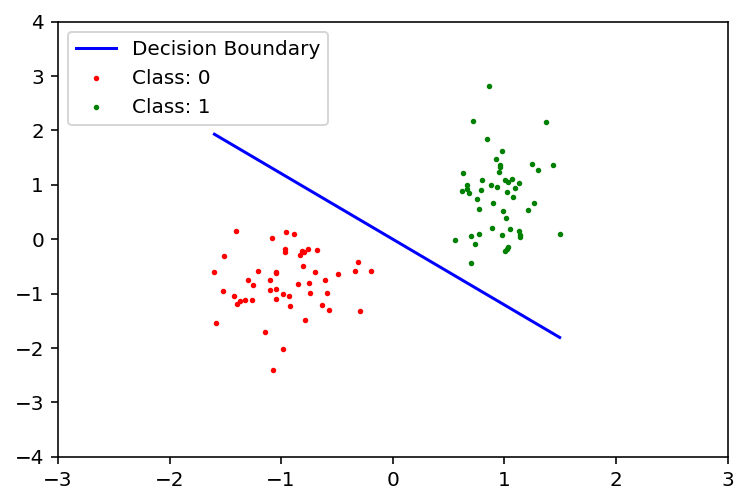

Predicted   0   1  All
Actual                
0           0  50   50
1          50   0   50
All        50  50  100


In [17]:
cost, grad = cost_function_regularized(init_theta, X, label, lambd)
print("Cost mit dem inital Theta: " ,cost)
print("Gradient und initial Theta: " ,grad)
plot_decision_boundary(df_task2, grad, 3)

predicted = prediction(grad, X)
matrix_task2 = confusion_matrix_binary(label[:,0], predicted[:,0])

### Gradient Descent

In [18]:
def gradient_descent(X, y, theta, alpha, iterations, lambd):
    m = len(y)
    cost_history = []
    
    for i in range(iterations):
        [cost, grad] = cost_function_regularized(theta, X, y, lambd)
        #print("cost ", cost)
        theta = theta - (alpha * grad)
        #print(grad)
        cost_history.append(cost)
        cost_decreasing = abs(cost_history[i-1] - cost)
        #print("decr ", cost_decreasing)
        if((i > 5) & (cost_decreasing < 1e-7) ) :
            print("Stop after iteration: ", i)  
            break

    return theta, cost_history


Der regularized theta:
 [[1.09506254e-03]
 [1.77548888e+00]
 [1.23602968e+00]]


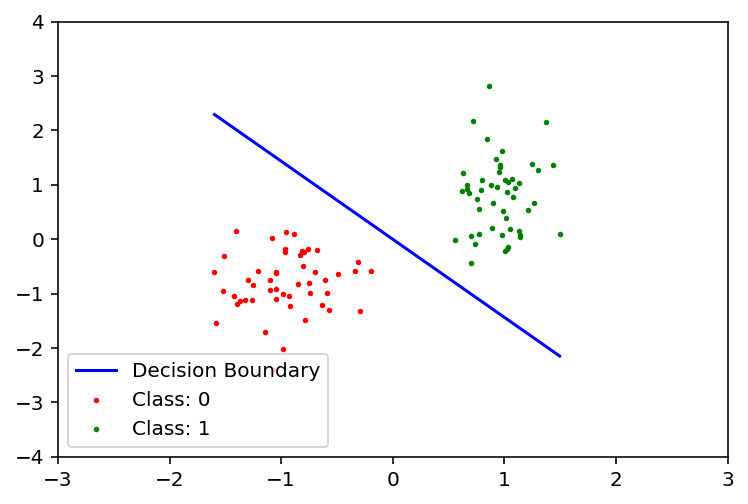

Predicted   0   1  All
Actual                
0          50   0   50
1           0  50   50
All        50  50  100


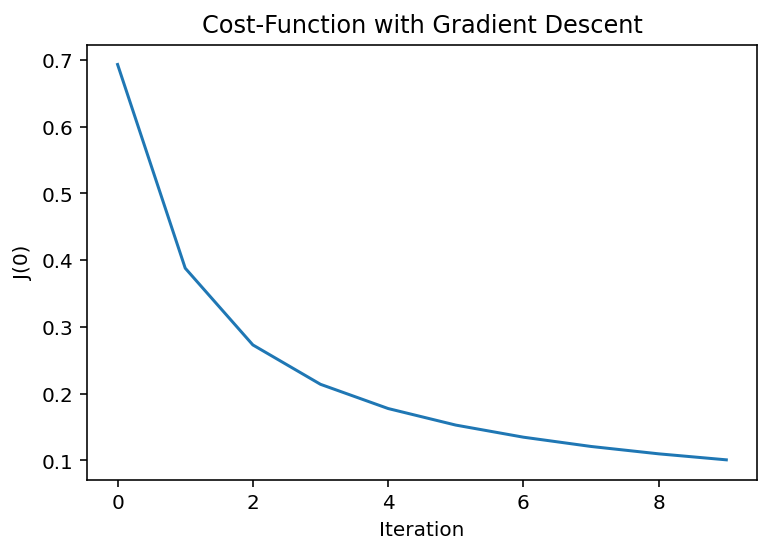

In [19]:
theta_task2, J_history = gradient_descent(X, label, init_theta, 1 , 10, 0)
print("Der regularized theta:\n",theta_task2)
plot_decision_boundary(df_task2, theta_task2, 3)

predicted = prediction(theta_task2, X)
matrix_task2 = confusion_matrix_binary(label[:,0], predicted[:,0])
plot_cost_history(J_history)

The gradient descent has hit the points perfectly.  A 100% accuracy was achieved, after 10 iterations and a learning rate of 1 and without regularisation. 
The cost minimization also has a nice curved shape and tends to a good minimum.

## Task3

In [20]:
df_task3 = [[]]*10 # 10 different datasets

datapoints_class_0 =  9000
datapoints_class_1 = 10000

std_decreasing_class_1 = np.linspace(4.5, 0.0, num=10) # [4.5 , 0.0 ] -> [ 0.0 , 0.0] in 10 steps  
print(std_decreasing_class_1)

for i in range(len(df_task3)):
    mean_class_0  = [ 0.0 , 0.0]
    std_class_0   = [ 1.0 , 1.0]
    x_class_0, label_class_0 = generate_dataset(mean_class_0, std_class_0, datapoints_class_0, 0)


    mean_class_1  = [ std_decreasing_class_1[i] , 0.0] 
    std_class_1   = [ 1.0 , 1.0]
    x_class_1, label_class_1 = generate_dataset(mean_class_1, std_class_1, datapoints_class_1, 1)
    
    X      = np.concatenate((x_class_0, x_class_1), axis=0)
    labels = np.concatenate((label_class_0, label_class_1), axis=0)
    
    X_norm, X_mean, X_std = feature_normalization(X)

    df_task3[i] = pd.DataFrame(data= { "x1": X[:,0], "x2": X[:,1], "x1_norm": X_norm[:,0], "x2_norm": X_norm[:,1] , "label": labels} )

[4.5 4.  3.5 3.  2.5 2.  1.5 1.  0.5 0. ]


Dataset Nr.  1


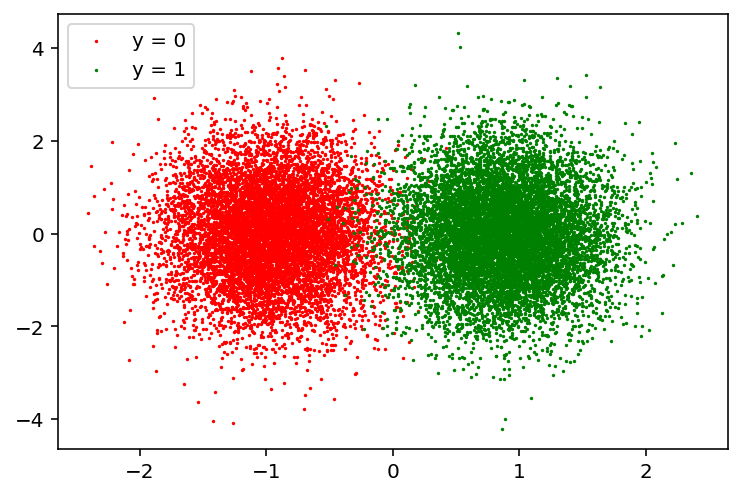

Dataset Nr.  2


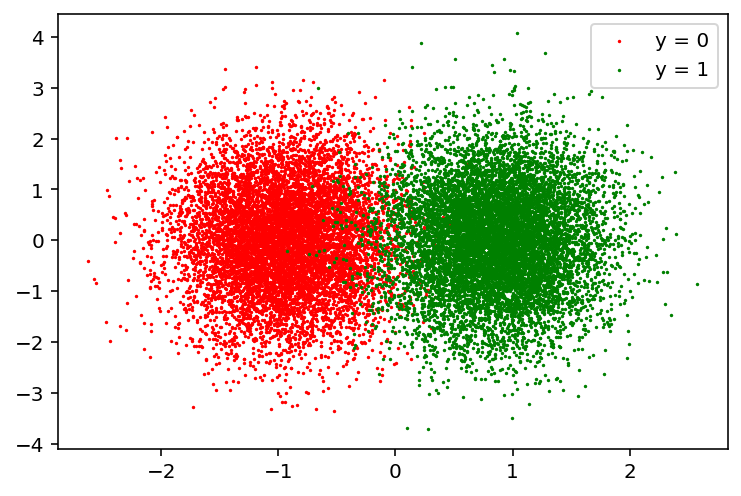

Dataset Nr.  3


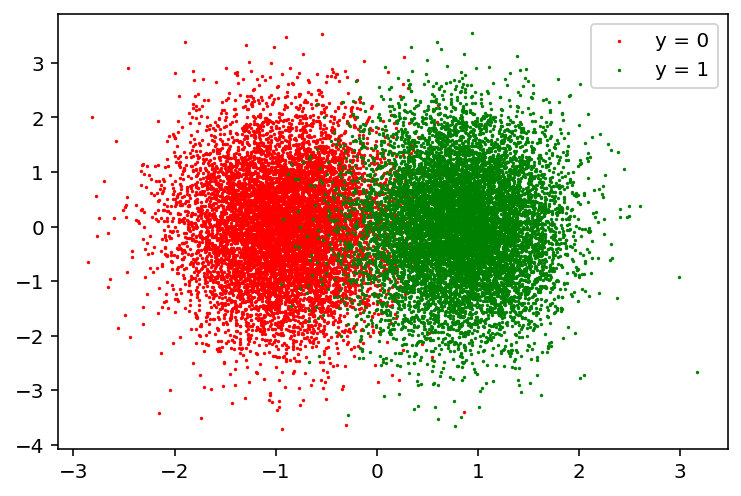

Dataset Nr.  4


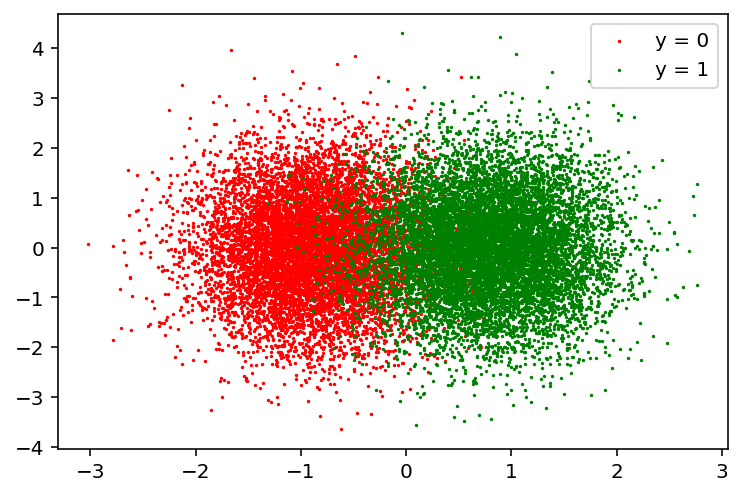

Dataset Nr.  5


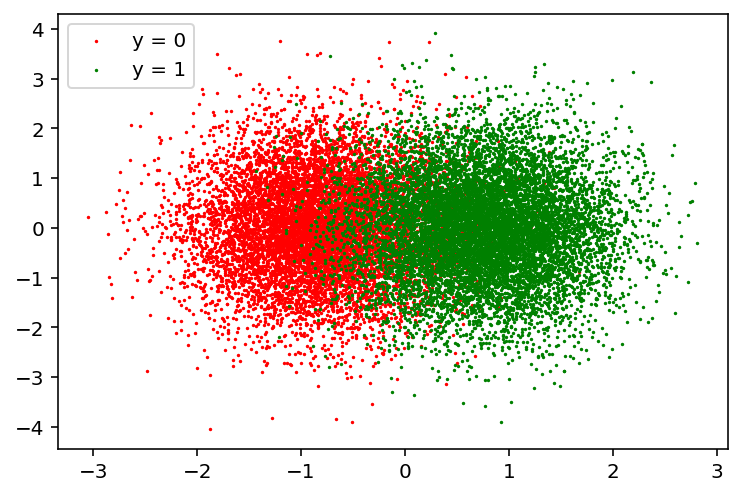

Dataset Nr.  6


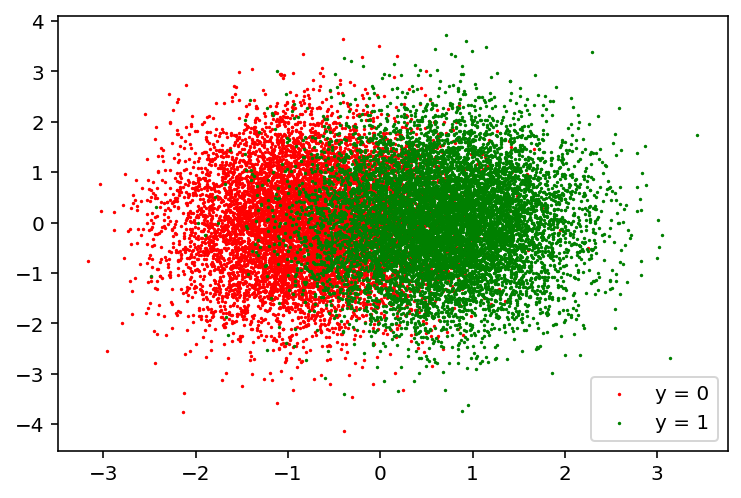

Dataset Nr.  7


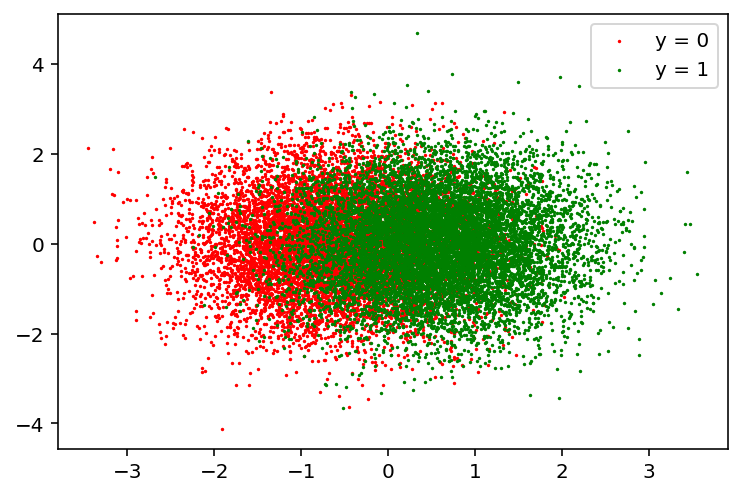

Dataset Nr.  8


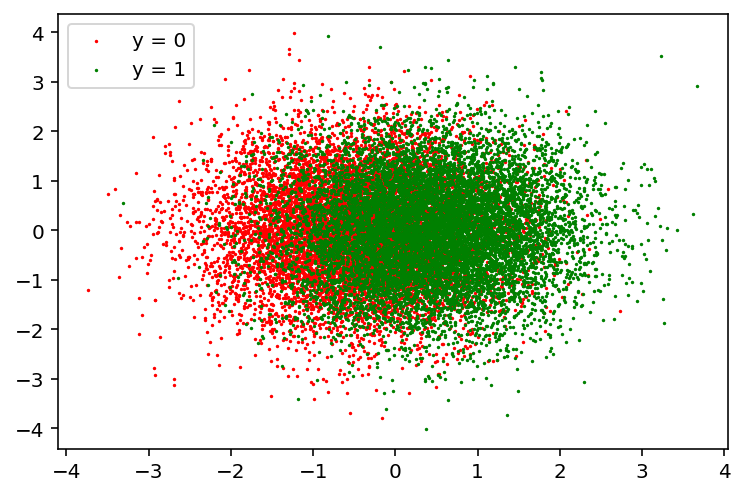

Dataset Nr.  9


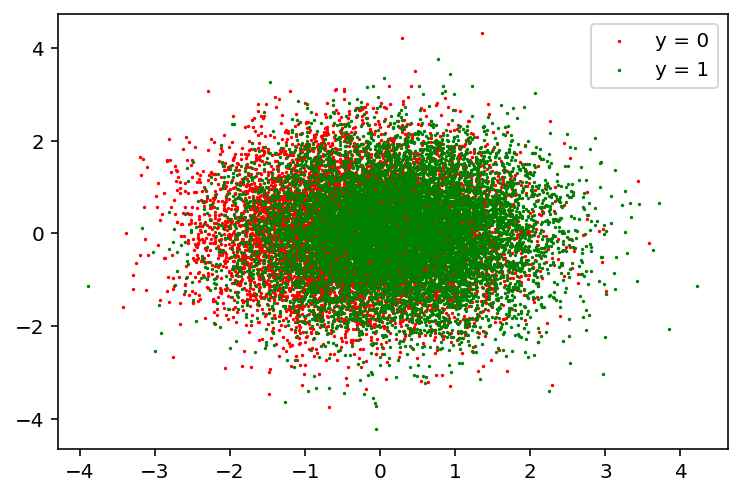

Dataset Nr.  10


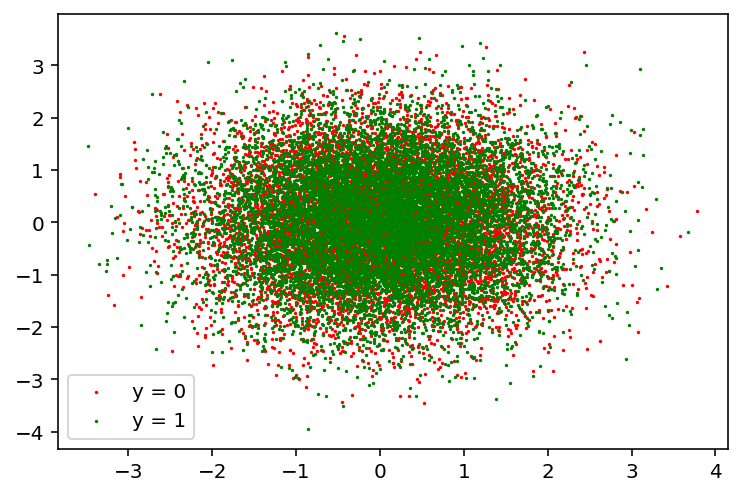

In [21]:
def plot_df(df):
    plt.figure()
    plt.scatter(df.x1_norm[df.label == 0], df.x2_norm[df.label == 0], color = "red", label="0", s=0.5) 
    plt.scatter(df.x1_norm[df.label == 1], df.x2_norm[df.label == 1], color = "green", label="1", s=0.5) 
    plt.legend(["y = 0","y = 1"])
    plt.show() 
    
for i in range(len(df_task3)):
    print("Dataset Nr. ", i+1)
    plot_df(df_task3[i])

In [22]:
def get_X_label(df):
    X     = np.column_stack([df.x1_norm, df.x2_norm])
    label = np.array(df.label)
    label = label.reshape(-1,1)
    return X, label

-------------------------------------
Dataset Nr. 1 with Lambda of 0 



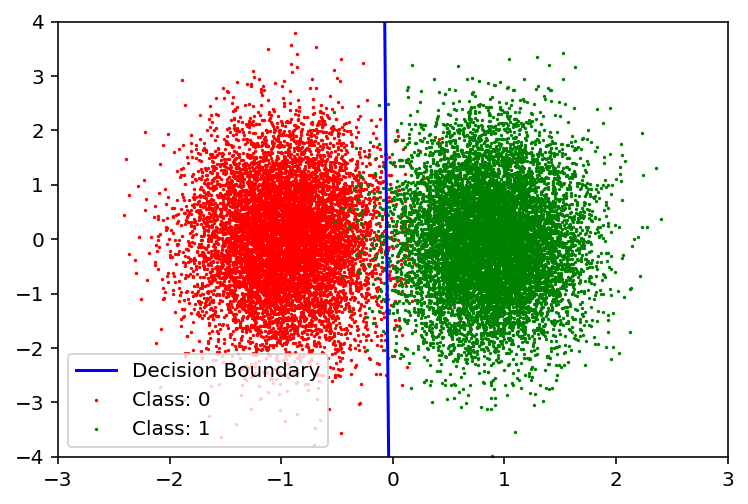

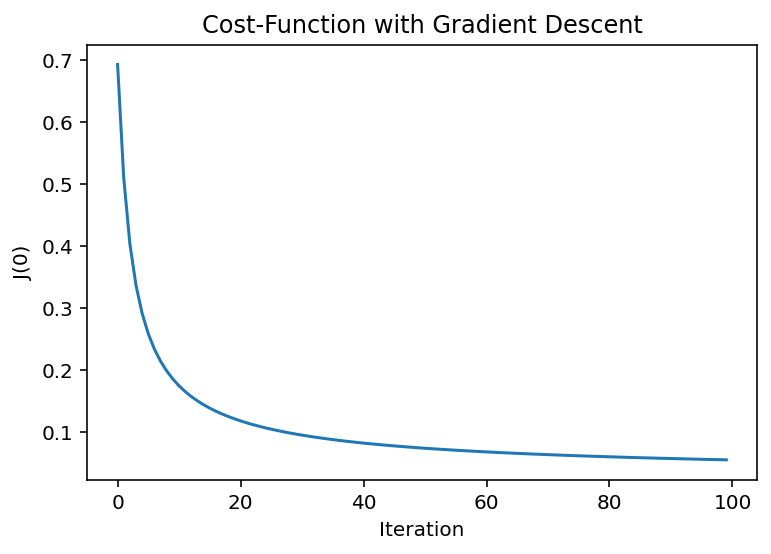

Predicted     0      1    All
Actual                       
0          8890    110   9000
1           107   9893  10000
All        8997  10003  19000
 

	  Precision 	 Recall 	 F1 
Class 0:  0.9878 	 0.9881 	 0.9879
Class 1:  0.9893 	 0.9890 	 0.9892

Accuracy: 0.9886
 
-------------------------------------
Dataset Nr. 2 with Lambda of 0 



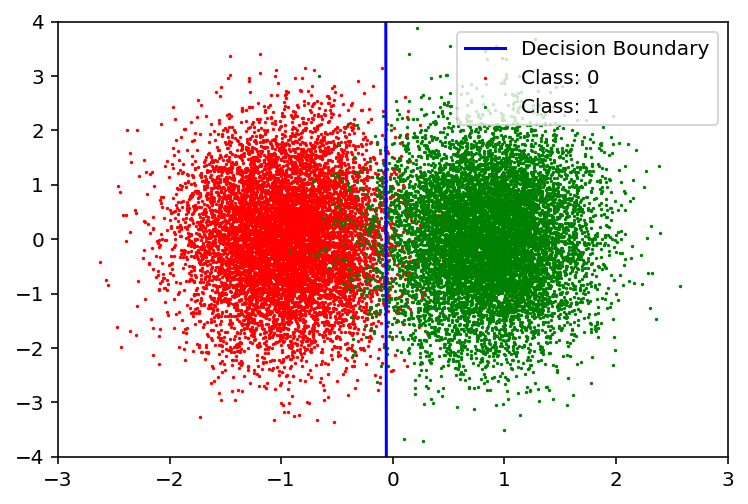

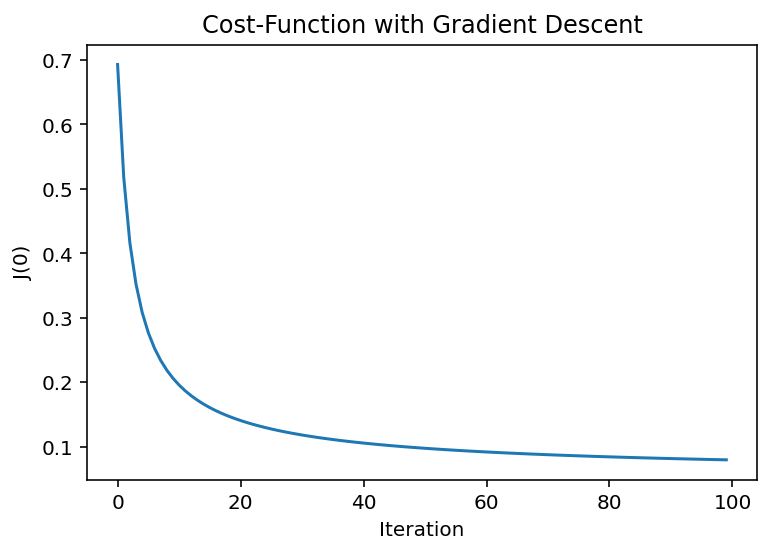

Predicted     0     1    All
Actual                      
0          8799   201   9000
1           235  9765  10000
All        9034  9966  19000
 

	  Precision 	 Recall 	 F1 
Class 0:  0.9777 	 0.9740 	 0.9758
Class 1:  0.9765 	 0.9798 	 0.9782

Accuracy: 0.9771
 
-------------------------------------
Dataset Nr. 3 with Lambda of 0 



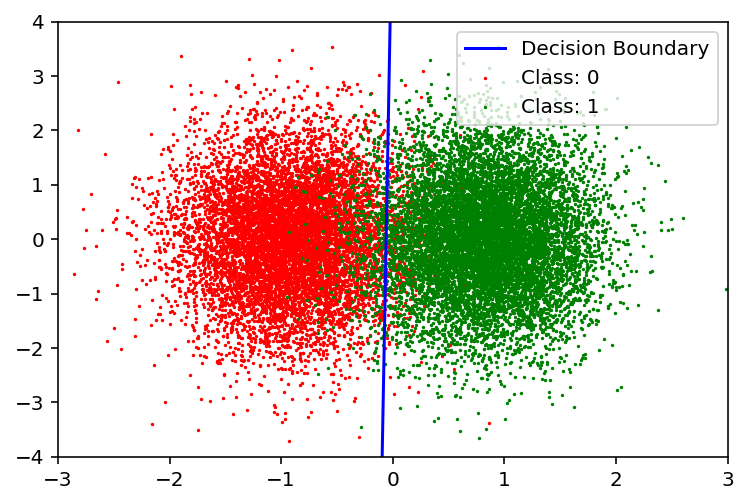

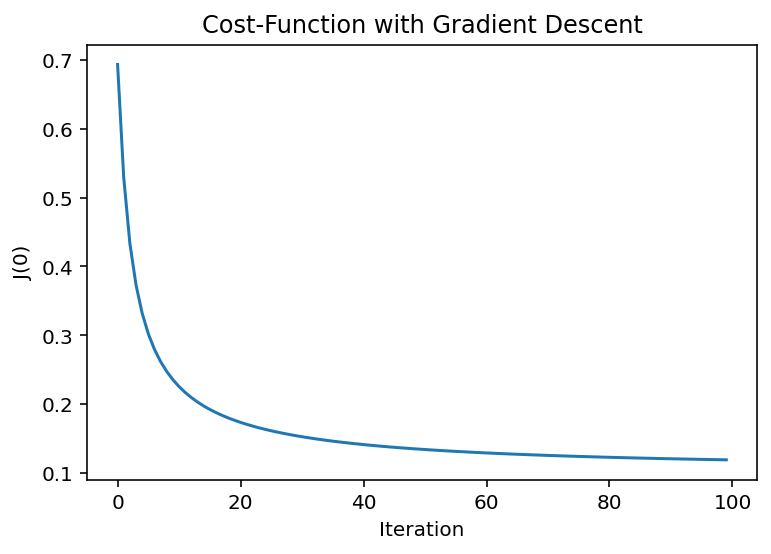

Predicted     0     1    All
Actual                      
0          8606   394   9000
1           400  9600  10000
All        9006  9994  19000
 

	  Precision 	 Recall 	 F1 
Class 0:  0.9562 	 0.9556 	 0.9559
Class 1:  0.9600 	 0.9606 	 0.9603

Accuracy: 0.9582
 
-------------------------------------
Dataset Nr. 4 with Lambda of 0 



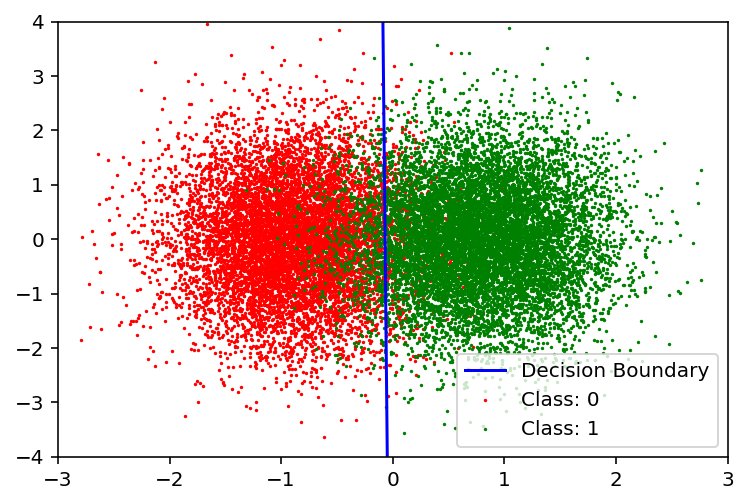

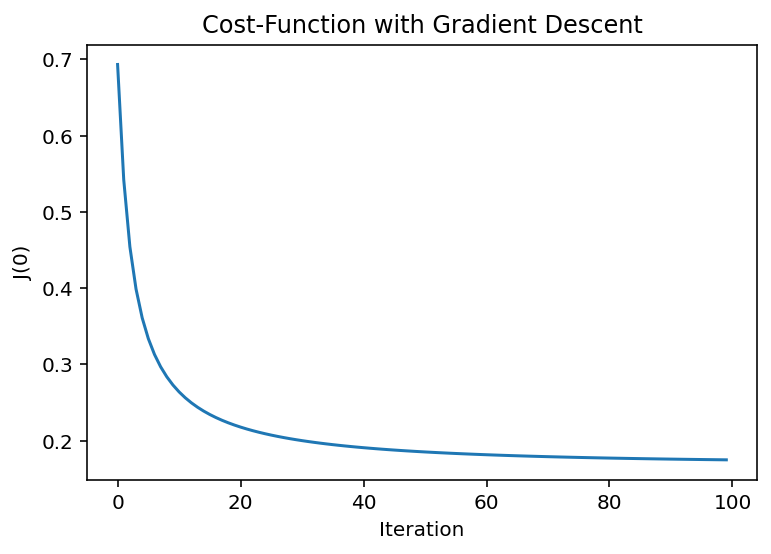

Predicted     0      1    All
Actual                       
0          8335    665   9000
1           614   9386  10000
All        8949  10051  19000
 

	  Precision 	 Recall 	 F1 
Class 0:  0.9261 	 0.9314 	 0.9287
Class 1:  0.9386 	 0.9338 	 0.9362

Accuracy: 0.9327
 
-------------------------------------
Dataset Nr. 5 with Lambda of 0 



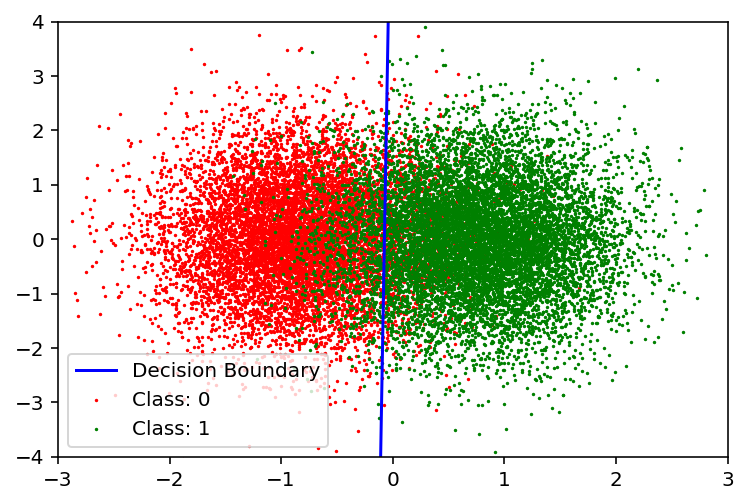

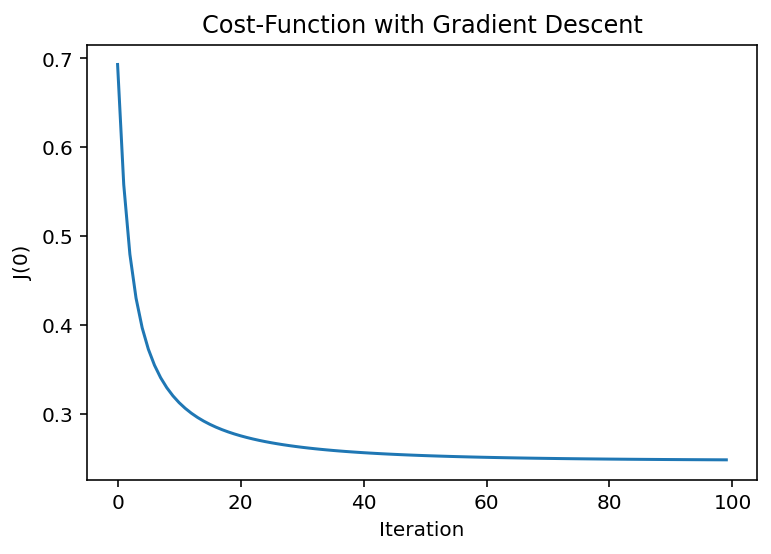

Predicted     0      1    All
Actual                       
0          8001    999   9000
1           956   9044  10000
All        8957  10043  19000
 

	  Precision 	 Recall 	 F1 
Class 0:  0.8890 	 0.8933 	 0.8911
Class 1:  0.9044 	 0.9005 	 0.9025

Accuracy: 0.8971
 
-------------------------------------
Dataset Nr. 6 with Lambda of 0 



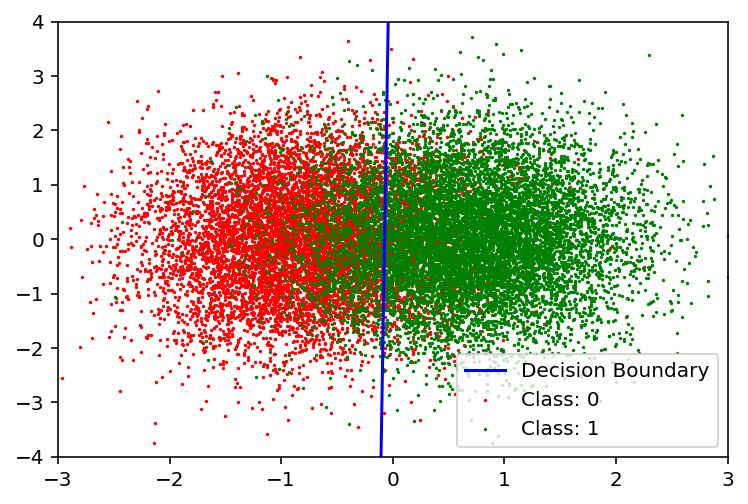

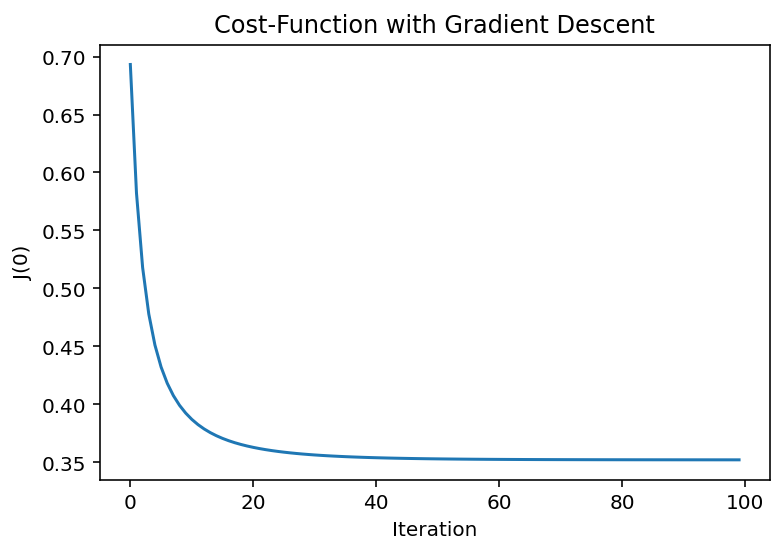

Predicted     0      1    All
Actual                       
0          7491   1509   9000
1          1421   8579  10000
All        8912  10088  19000
 

	  Precision 	 Recall 	 F1 
Class 0:  0.8323 	 0.8406 	 0.8364
Class 1:  0.8579 	 0.8504 	 0.8541

Accuracy: 0.8458
 
-------------------------------------
Dataset Nr. 7 with Lambda of 0 

Stop after iteration:  73


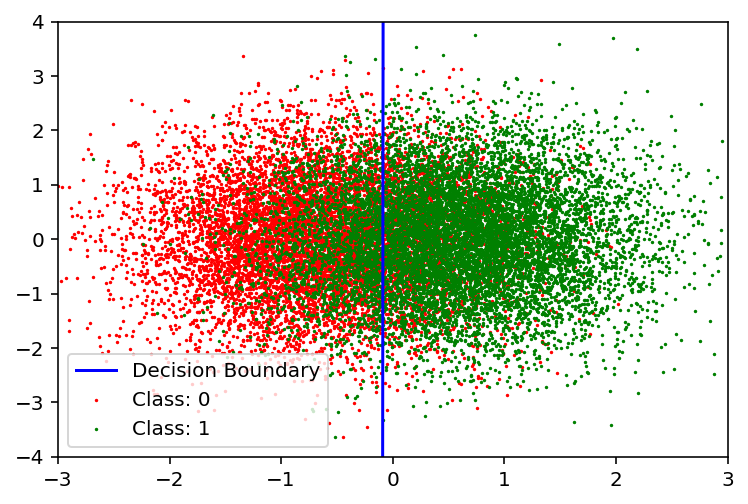

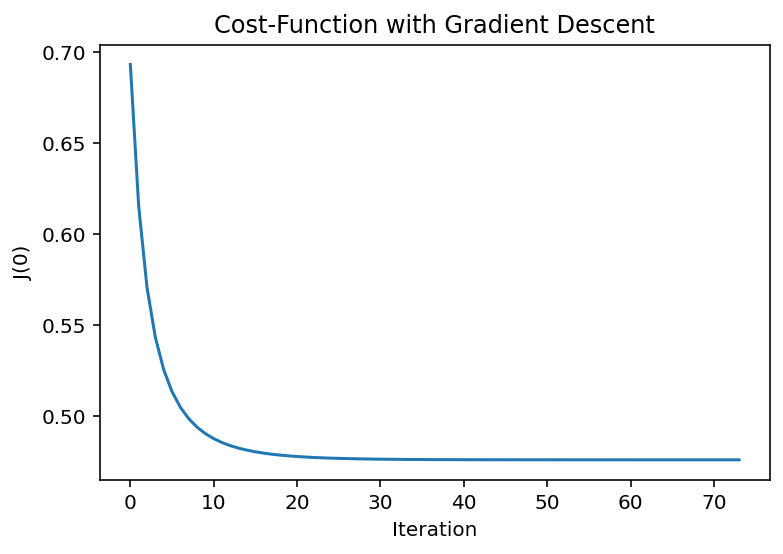

Predicted     0      1    All
Actual                       
0          6727   2273   9000
1          2073   7927  10000
All        8800  10200  19000
 

	  Precision 	 Recall 	 F1 
Class 0:  0.7474 	 0.7644 	 0.7558
Class 1:  0.7927 	 0.7772 	 0.7849

Accuracy: 0.7713
 
-------------------------------------
Dataset Nr. 8 with Lambda of 0 

Stop after iteration:  43


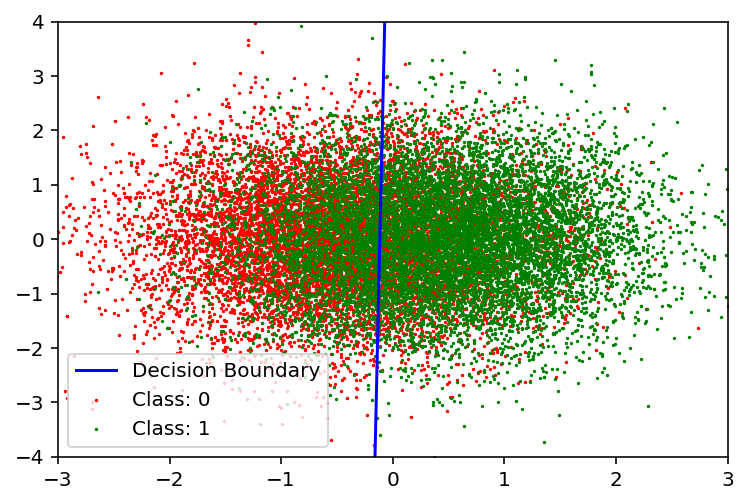

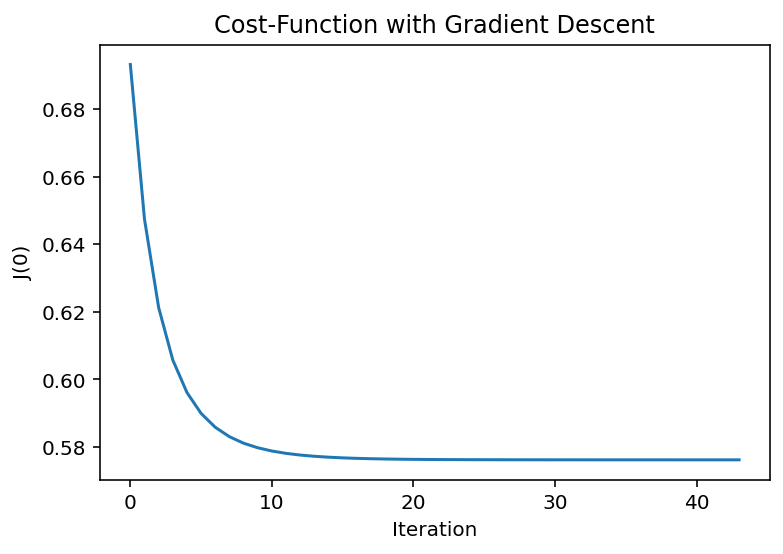

Predicted     0      1    All
Actual                       
0          5942   3058   9000
1          2732   7268  10000
All        8674  10326  19000
 

	  Precision 	 Recall 	 F1 
Class 0:  0.6602 	 0.6850 	 0.6724
Class 1:  0.7268 	 0.7039 	 0.7151

Accuracy: 0.6953
 
-------------------------------------
Dataset Nr. 9 with Lambda of 0 

Stop after iteration:  26


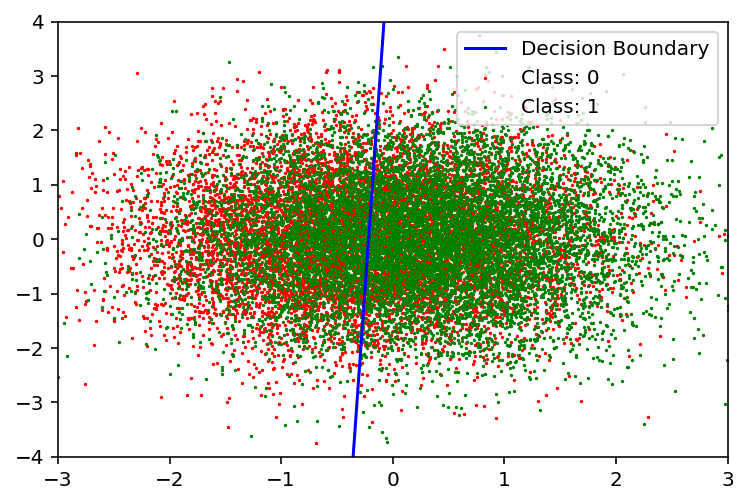

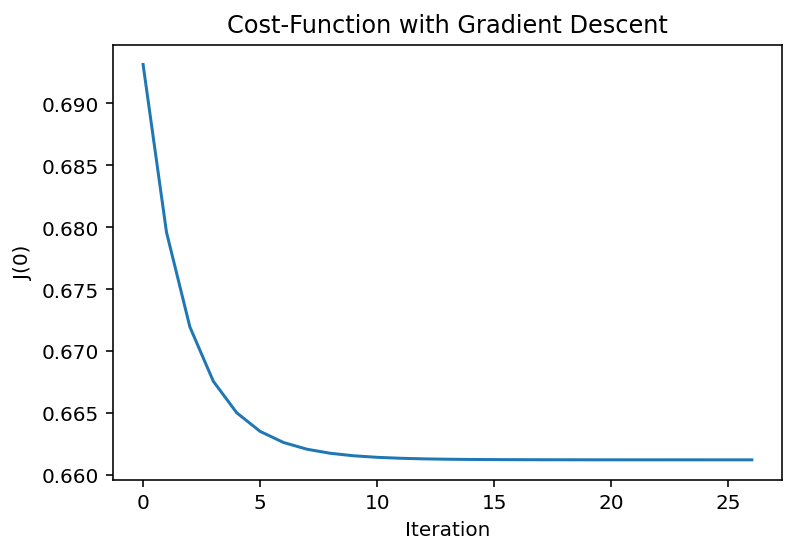

Predicted     0      1    All
Actual                       
0          4636   4364   9000
1          3224   6776  10000
All        7860  11140  19000
 

	  Precision 	 Recall 	 F1 
Class 0:  0.5151 	 0.5898 	 0.5499
Class 1:  0.6776 	 0.6083 	 0.6411

Accuracy: 0.6006
 
-------------------------------------
Dataset Nr. 10 with Lambda of 0 

Stop after iteration:  17


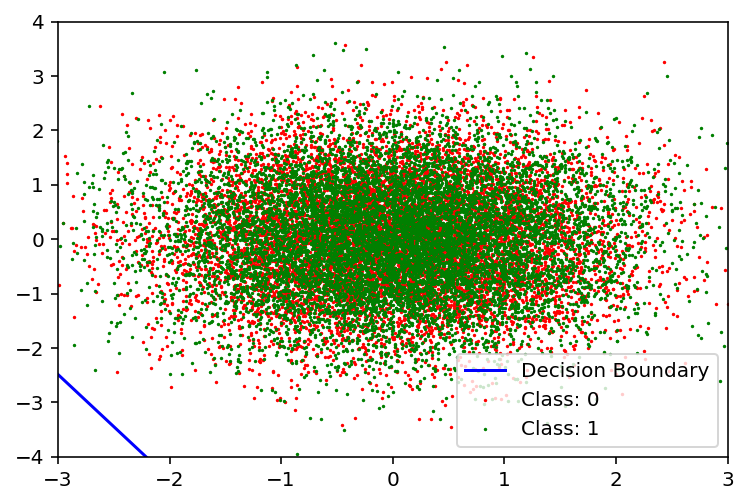

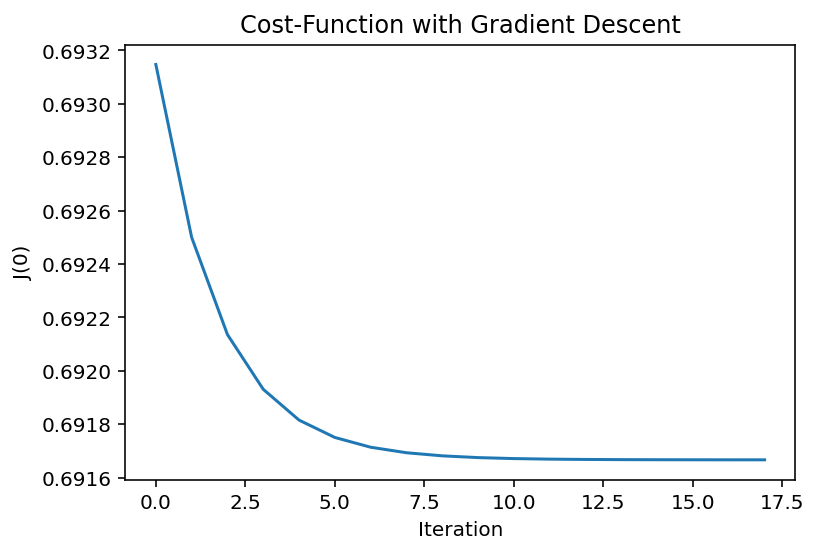

[[    0.  9000.  9000.]
 [    0. 10000. 10000.]
 [    0. 19000. 19000.]]
 

	  Precision 	 Recall 	 F1 
Class 0:  0.0000 	 0.0000 	 0.0000
Class 1:  0.5263 	 1.0000 	 0.6897

Accuracy: 0.5263
 
-------------------------------------
Dataset Nr. 1 with Lambda of 10 



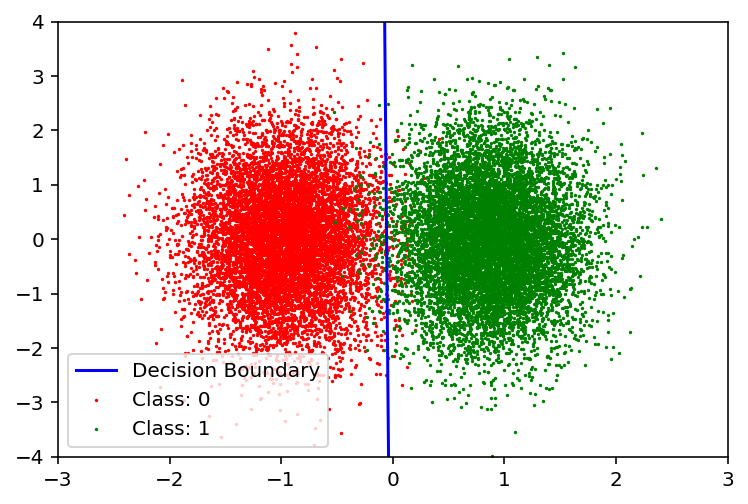

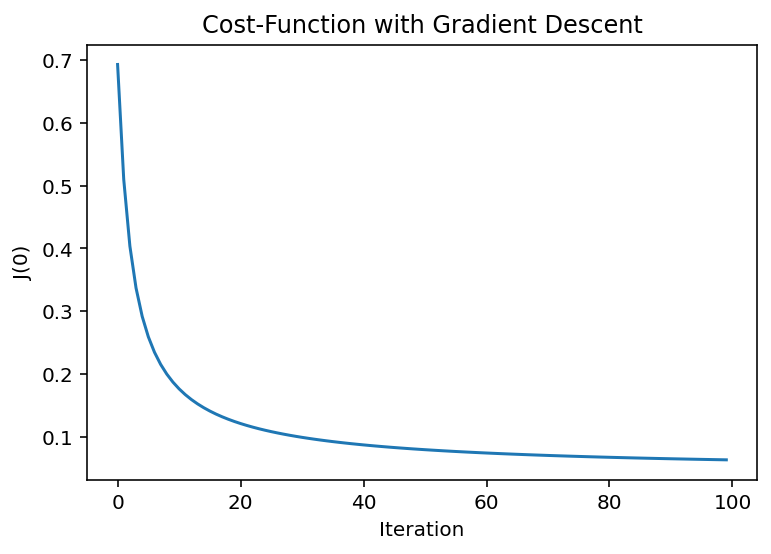

Predicted     0      1    All
Actual                       
0          8889    111   9000
1           107   9893  10000
All        8996  10004  19000
 

	  Precision 	 Recall 	 F1 
Class 0:  0.9877 	 0.9881 	 0.9879
Class 1:  0.9893 	 0.9889 	 0.9891

Accuracy: 0.9885
 
-------------------------------------
Dataset Nr. 2 with Lambda of 10 



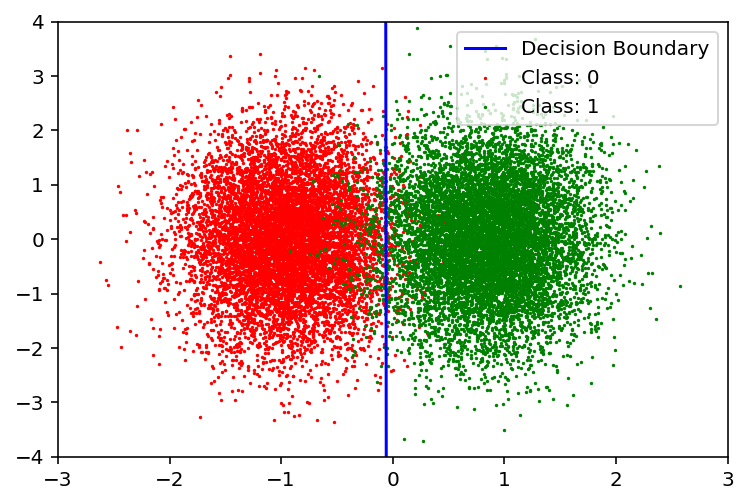

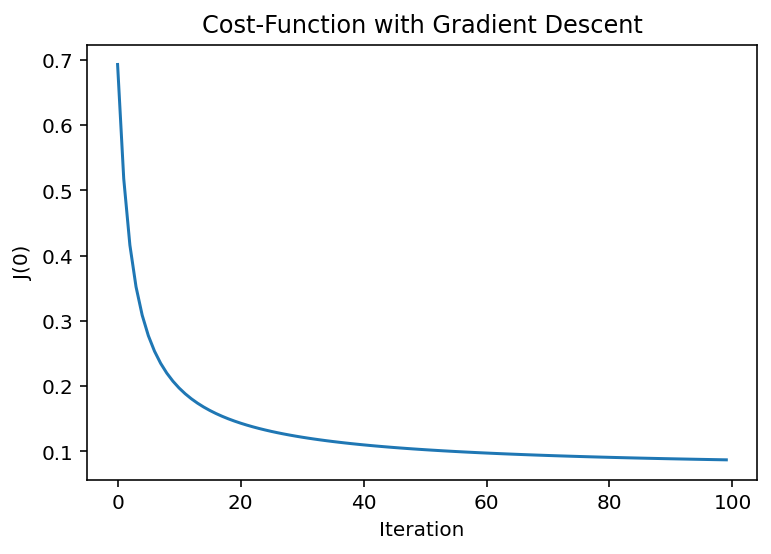

Predicted     0     1    All
Actual                      
0          8797   203   9000
1           234  9766  10000
All        9031  9969  19000
 

	  Precision 	 Recall 	 F1 
Class 0:  0.9774 	 0.9741 	 0.9758
Class 1:  0.9766 	 0.9796 	 0.9781

Accuracy: 0.9770
 
-------------------------------------
Dataset Nr. 3 with Lambda of 10 



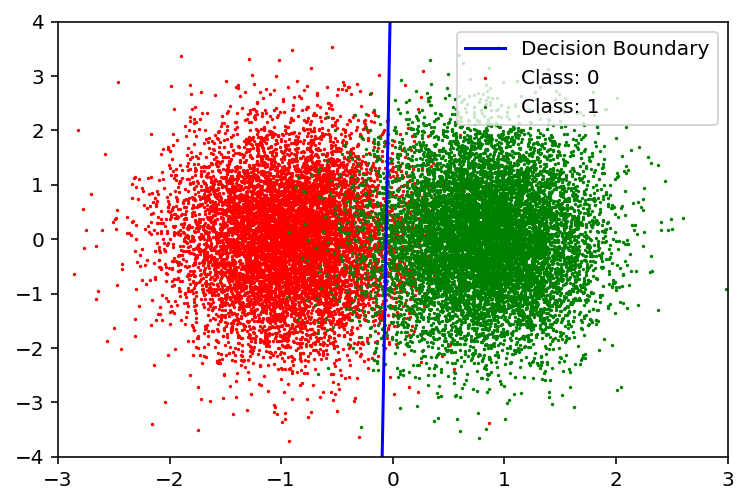

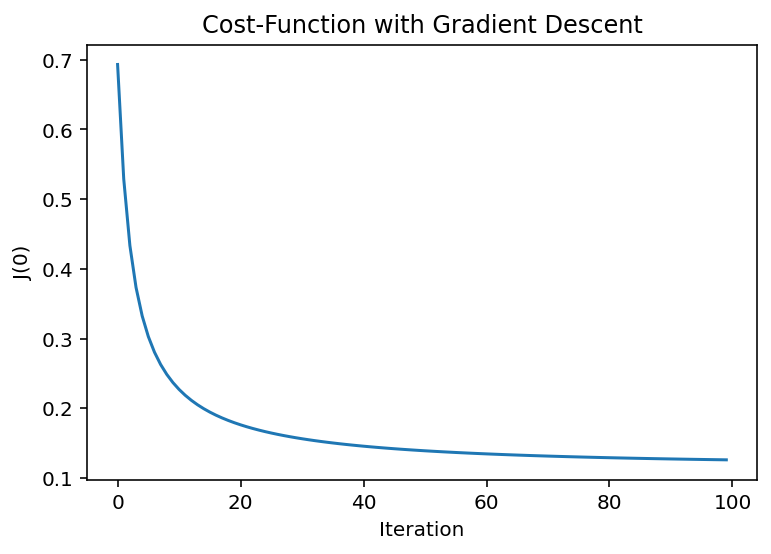

Predicted     0     1    All
Actual                      
0          8604   396   9000
1           400  9600  10000
All        9004  9996  19000
 

	  Precision 	 Recall 	 F1 
Class 0:  0.9560 	 0.9556 	 0.9558
Class 1:  0.9600 	 0.9604 	 0.9602

Accuracy: 0.9581
 
-------------------------------------
Dataset Nr. 4 with Lambda of 10 



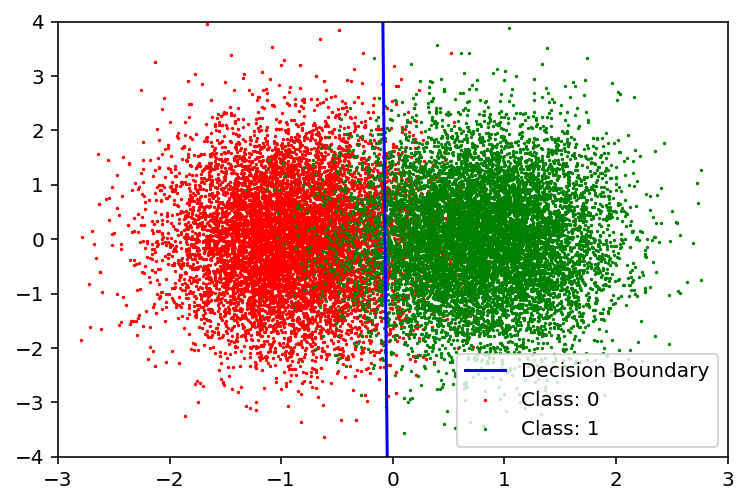

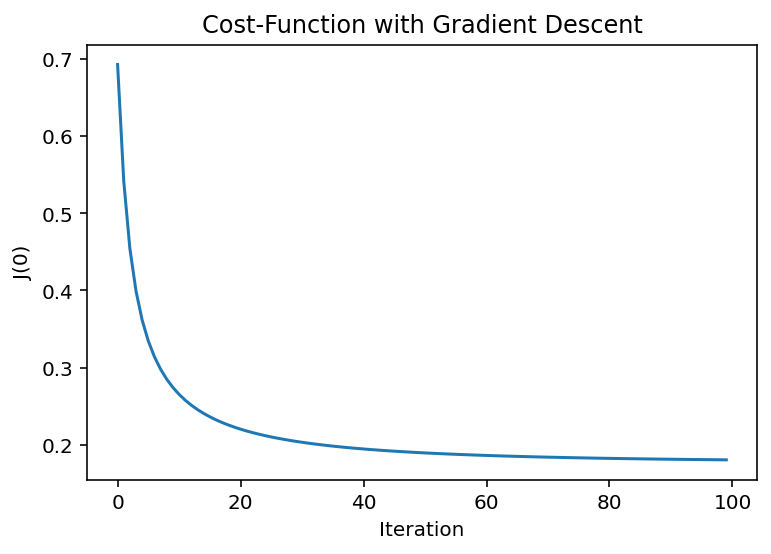

Predicted     0      1    All
Actual                       
0          8333    667   9000
1           613   9387  10000
All        8946  10054  19000
 

	  Precision 	 Recall 	 F1 
Class 0:  0.9259 	 0.9315 	 0.9287
Class 1:  0.9387 	 0.9337 	 0.9362

Accuracy: 0.9326
 
-------------------------------------
Dataset Nr. 5 with Lambda of 10 



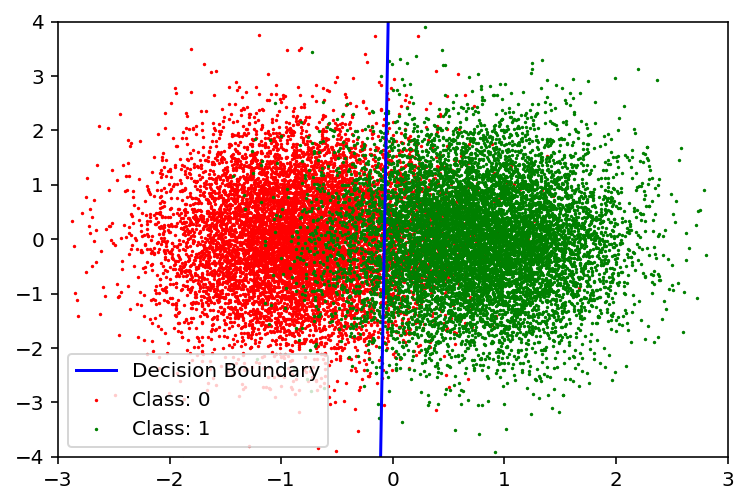

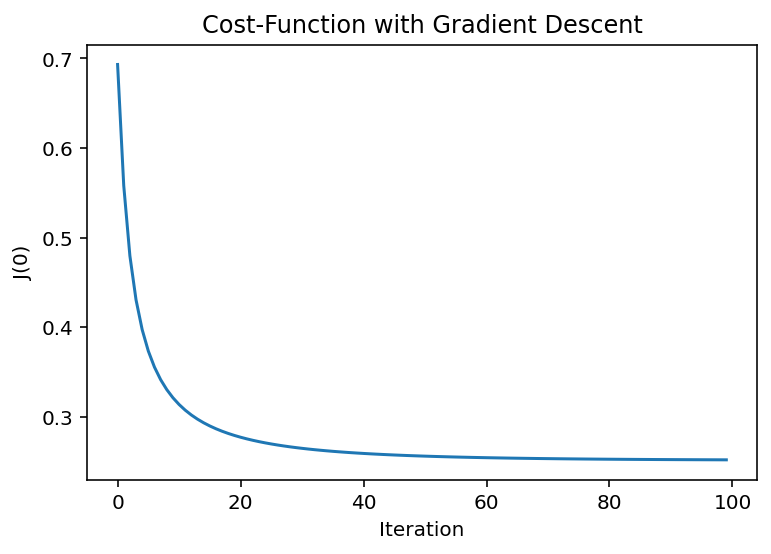

Predicted     0      1    All
Actual                       
0          7999   1001   9000
1           955   9045  10000
All        8954  10046  19000
 

	  Precision 	 Recall 	 F1 
Class 0:  0.8888 	 0.8933 	 0.8911
Class 1:  0.9045 	 0.9004 	 0.9024

Accuracy: 0.8971
 
-------------------------------------
Dataset Nr. 6 with Lambda of 10 



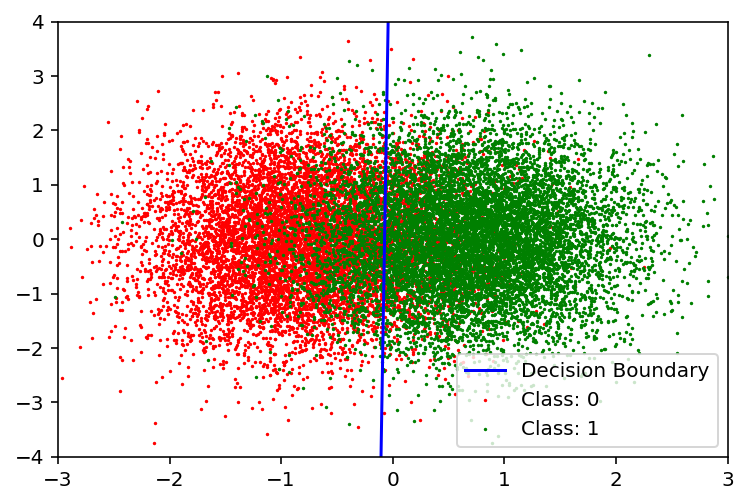

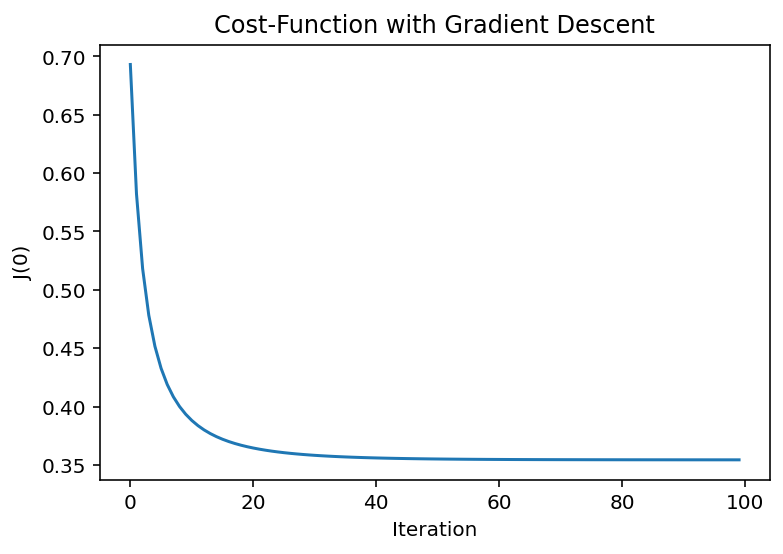

Predicted     0      1    All
Actual                       
0          7490   1510   9000
1          1419   8581  10000
All        8909  10091  19000
 

	  Precision 	 Recall 	 F1 
Class 0:  0.8322 	 0.8407 	 0.8365
Class 1:  0.8581 	 0.8504 	 0.8542

Accuracy: 0.8458
 
-------------------------------------
Dataset Nr. 7 with Lambda of 10 

Stop after iteration:  71


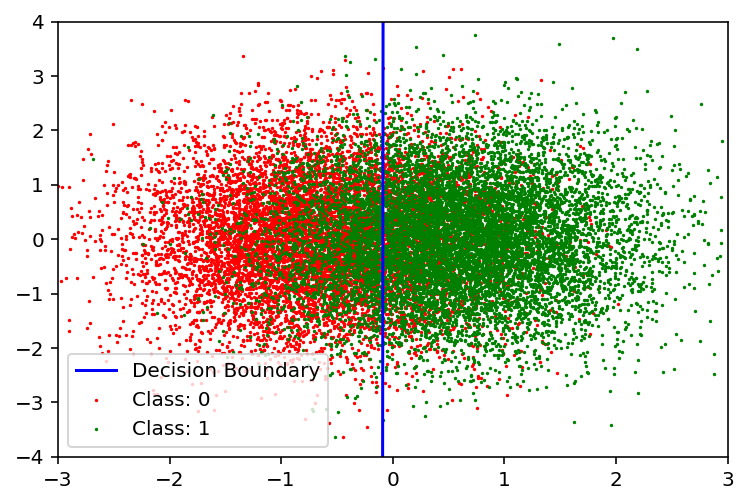

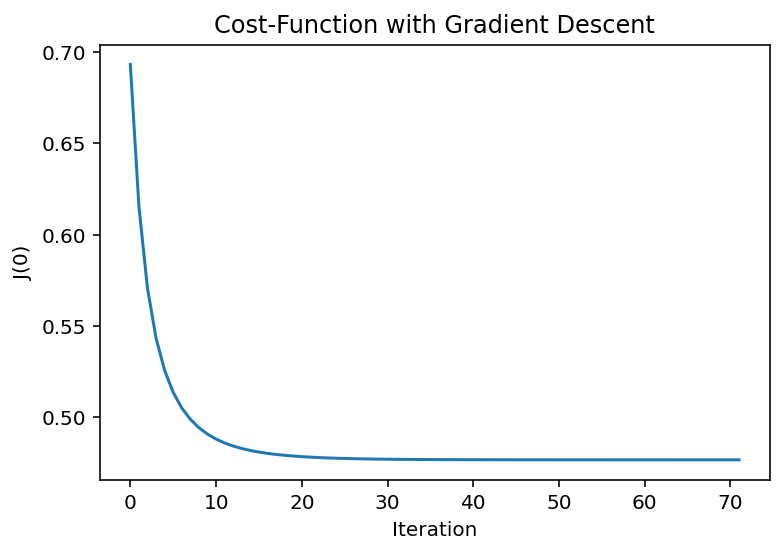

Predicted     0      1    All
Actual                       
0          6727   2273   9000
1          2073   7927  10000
All        8800  10200  19000
 

	  Precision 	 Recall 	 F1 
Class 0:  0.7474 	 0.7644 	 0.7558
Class 1:  0.7927 	 0.7772 	 0.7849

Accuracy: 0.7713
 
-------------------------------------
Dataset Nr. 8 with Lambda of 10 

Stop after iteration:  42


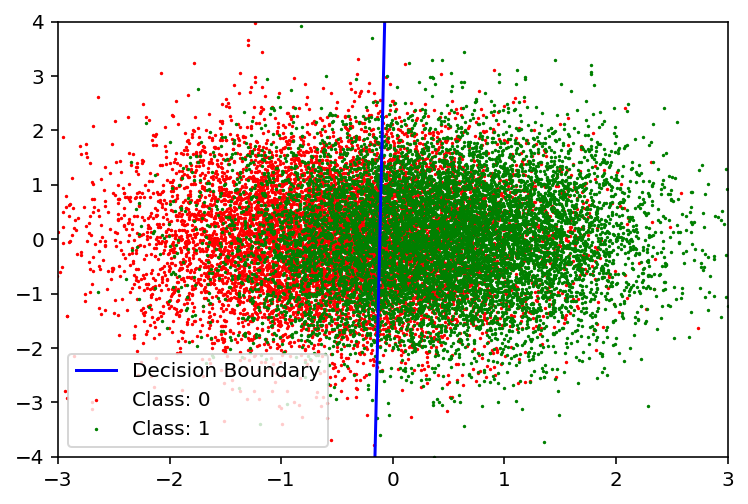

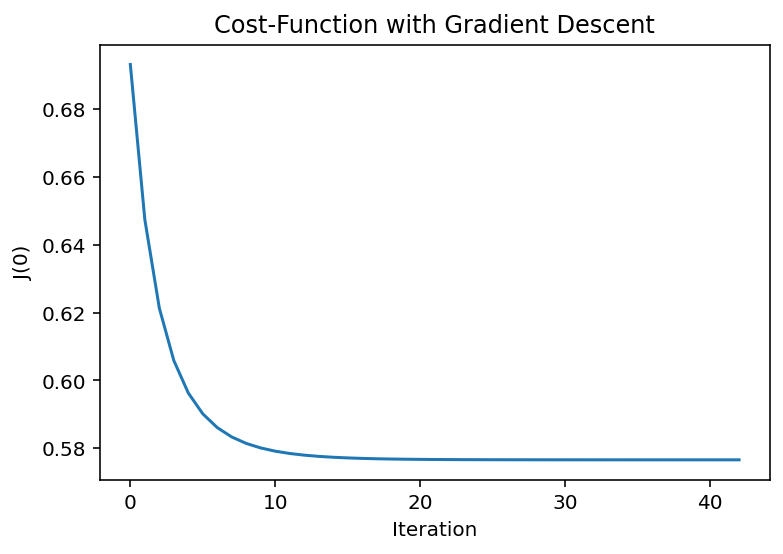

Predicted     0      1    All
Actual                       
0          5942   3058   9000
1          2731   7269  10000
All        8673  10327  19000
 

	  Precision 	 Recall 	 F1 
Class 0:  0.6602 	 0.6851 	 0.6724
Class 1:  0.7269 	 0.7039 	 0.7152

Accuracy: 0.6953
 
-------------------------------------
Dataset Nr. 9 with Lambda of 10 

Stop after iteration:  26


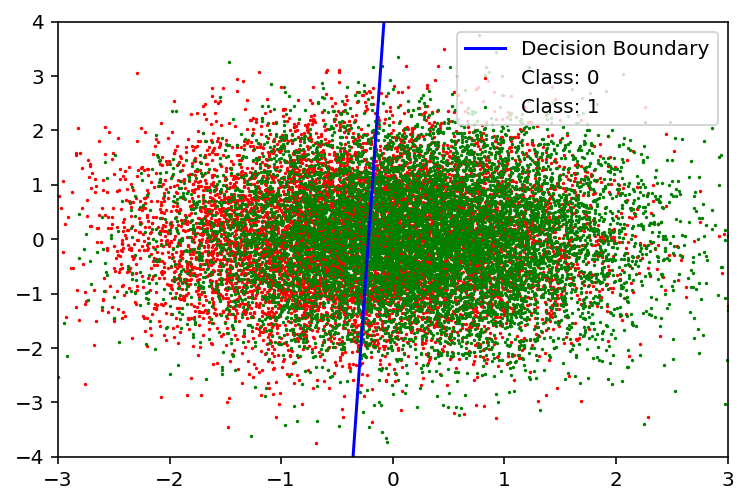

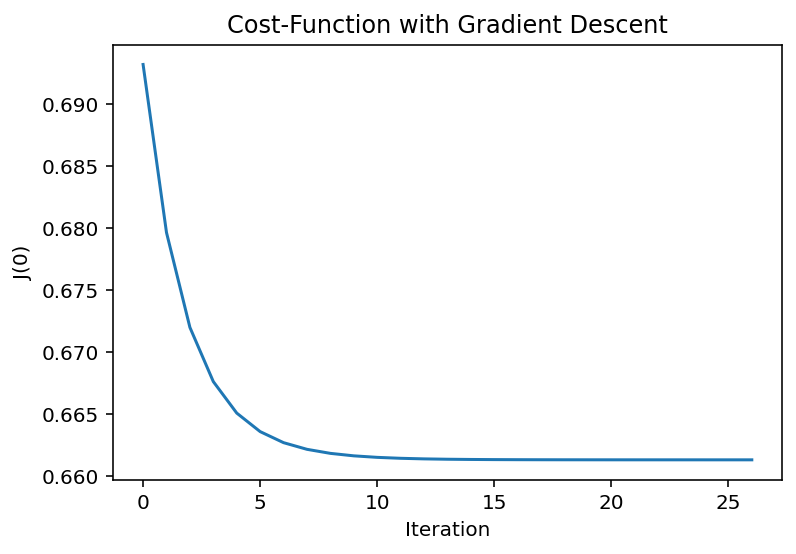

Predicted     0      1    All
Actual                       
0          4631   4369   9000
1          3224   6776  10000
All        7855  11145  19000
 

	  Precision 	 Recall 	 F1 
Class 0:  0.5146 	 0.5896 	 0.5495
Class 1:  0.6776 	 0.6080 	 0.6409

Accuracy: 0.6004
 
-------------------------------------
Dataset Nr. 10 with Lambda of 10 

Stop after iteration:  17


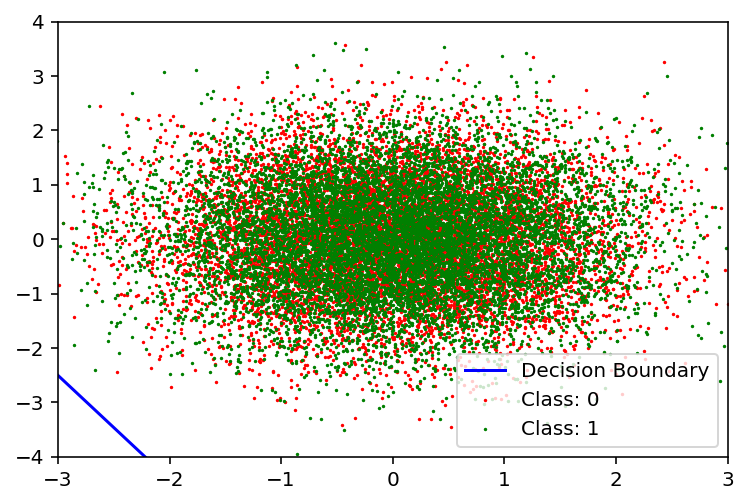

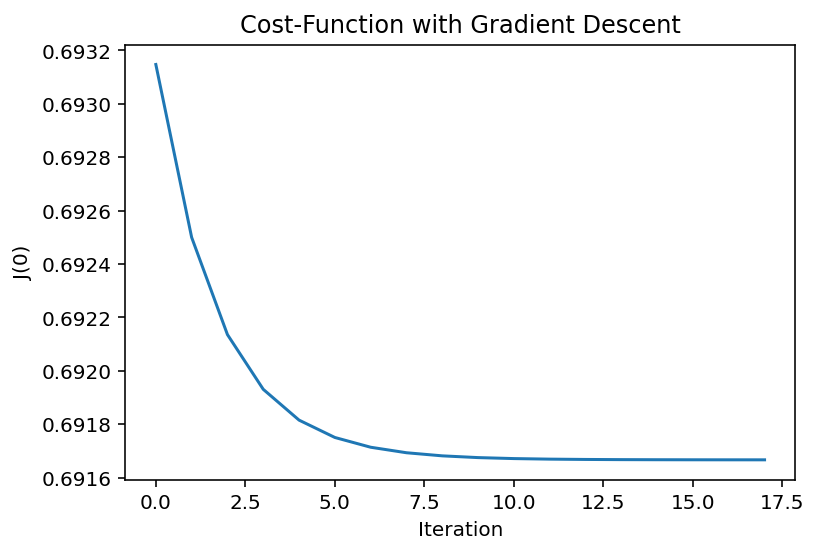

[[    0.  9000.  9000.]
 [    0. 10000. 10000.]
 [    0. 19000. 19000.]]
 

	  Precision 	 Recall 	 F1 
Class 0:  0.0000 	 0.0000 	 0.0000
Class 1:  0.5263 	 1.0000 	 0.6897

Accuracy: 0.5263
 


In [23]:
gradient_descent_iterations = 100

for lambd in [0,10]:
    for i in range(len(df_task3)):
        print(f"-------------------------------------\nDataset Nr. {i+1} with Lambda of {lambd} \n")

        X , label = get_X_label(df_task3[i])
 
        m, n = X.shape

        X = np.append(np.ones((m,1)),X,axis=1) 

        init_theta = np.zeros((n+1,1))

        theta, J_history = gradient_descent(X, label, init_theta, 1 , gradient_descent_iterations, lambd)

        plot_decision_boundary(df_task3[i], theta)

        plot_cost_history(J_history)

        predicted = prediction(theta, X)

        matrix = confusion_matrix_binary(label[:,0], predicted[:,0])
        #print_binary_confusion_matrix(matrix)
        print(" ")
        metrics = calculate_metrics(matrix)
        print_metrics(metrics)
        print(" ")

As expected the Decision Boundary always tries to take its place as good as possible between the two point-clouds. Interestingly, when it is at the last one (No. 10, lambda = 10 and 0), when the two datasets are exactly on top of each other, the decision boundary doesn't know where to go and flies completely out of the picture.

## Task4

In [24]:
df_task4_train = pd.read_csv("./house_train_data.csv")
df_task4_test = pd.read_csv("./house_test_data.csv")

Amound of train data: 17384 

Waterfront Y_Train

0    17251
1      133
Name: waterfront, dtype: int64

Waterfront X_Train
Amound of test data: 4229 

Waterfront Y_Test

0    4199
1      30
Name: waterfront, dtype: int64

Waterfront X_Test
(4229, 3) (4229, 1)


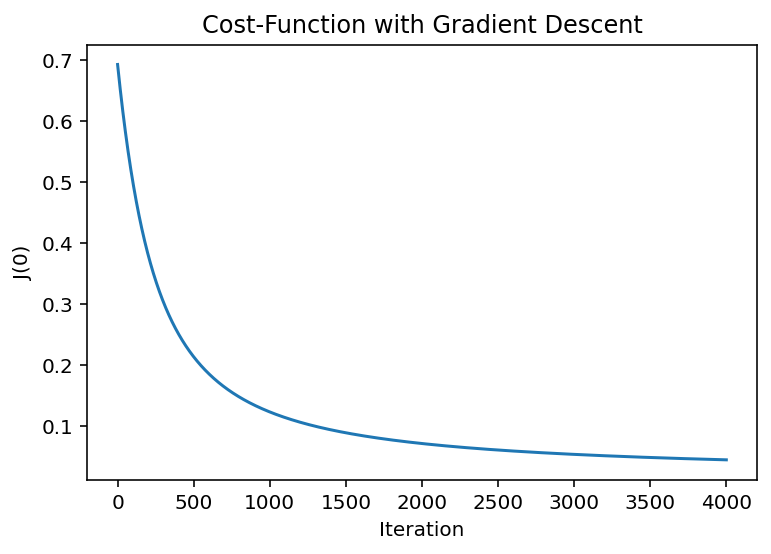

Predicted      0  1    All
Actual                    
0          17249  2  17251
1            128  5    133
All        17377  7  17384
 

	  Precision 	 Recall 	 F1 
Class 0:  0.9999 	 0.9926 	 0.9962
Class 1:  0.0376 	 0.7143 	 0.0714

Accuracy: 0.9925


In [25]:
feature_set_1 = ["price", "view", "zipcode"] 

selected_feature_set = feature_set_1

df_task4_train = pd.read_csv("./house_train_data.csv")

x_train = df_task4_train[selected_feature_set]
y_train = df_task4_train["waterfront"]

print(f"Amound of train data: {len(y_train)} \n")

print("Waterfront Y_Train\n")
print(y_train.value_counts())

print("\nWaterfront X_Train")
x_train.head()

x_train = np.column_stack([x_train.iloc[:, i] for i in range(0, x_train.shape[1])])
y_train = np.array(y_train)
y_train = y_train.reshape(-1,1)

x_train, X_mean, X_std = feature_normalization(x_train)

m, n = x_train.shape

x_train = np.append(np.ones((m,1)), x_train ,axis=1) # x = np.insert(X, 0, 1, axis=1)

init_theta = np.zeros((n+1,1))

# ----- Test Variable
df_task4_test = pd.read_csv("./house_test_data.csv")

x_test = df_task4_test[selected_feature_set]
y_test = df_task4_test["waterfront"]

print(f"Amound of test data: {len(y_test)} \n")

print("Waterfront Y_Test\n")
print(y_test.value_counts())

print("\nWaterfront X_Test")
x_test.head()
x_test = np.column_stack([x_test.iloc[:, i] for i in range(0, x_test.shape[1])])
 
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)

print(x_test.shape, y_test.shape)


x_test, X_mean, X_std = feature_normalization(x_test)
   

theta, J_history = gradient_descent(x_train, y_train, init_theta, 0.01 , 4000, 0.5 )

plot_cost_history(J_history)
    
predicted = prediction(theta, x_train)

matrix = confusion_matrix_binary(y_train[:,0], predicted[:,0])
print(" ")
metrics = calculate_metrics(matrix)
print_metrics(metrics)


Amound of train data: 17384 

Waterfront Y_Train

0    17251
1      133
Name: waterfront, dtype: int64

Waterfront X_Train
Amound of test data: 4229 

Waterfront Y_Test

0    4199
1      30
Name: waterfront, dtype: int64

Waterfront X_Test
(4229, 2) (4229, 1)


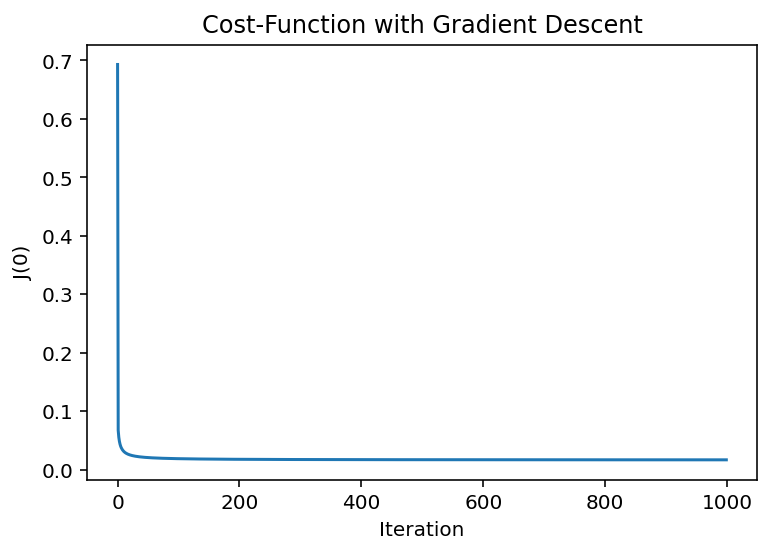

[[    0. 17251. 17251.]
 [    0.   133.   133.]
 [    0. 17384. 17384.]]

	  Precision 	 Recall 	 F1 
Class 0:  0.0000 	 0.0000 	 0.0000
Class 1:  0.0077 	 1.0000 	 0.0152

Accuracy: 0.0077


In [26]:
feature_set_2 = ["view", "zipcode"] 

selected_feature_set = feature_set_2

df_task4_train = pd.read_csv("./house_train_data.csv")

x_train = df_task4_train[selected_feature_set]
y_train = df_task4_train["waterfront"]

print(f"Amound of train data: {len(y_train)} \n")

print("Waterfront Y_Train\n")
print(y_train.value_counts())

print("\nWaterfront X_Train")
x_train.head()

x_train = np.column_stack([x_train.iloc[:, i] for i in range(0, x_train.shape[1])])
y_train = np.array(y_train)
y_train = y_train.reshape(-1,1)

x_train, X_mean, X_std = feature_normalization(x_train)

m, n = x_train.shape

x_train = np.append(np.ones((m,1)), x_train ,axis=1) # x = np.insert(X, 0, 1, axis=1)

init_theta = np.zeros((n+1,1))

# ----- Test Variable
df_task4_test = pd.read_csv("./house_test_data.csv")

x_test = df_task4_test[selected_feature_set]
y_test = df_task4_test["waterfront"]

print(f"Amound of test data: {len(y_test)} \n")

print("Waterfront Y_Test\n")
print(y_test.value_counts())

print("\nWaterfront X_Test")
x_test.head()
x_test = np.column_stack([x_test.iloc[:, i] for i in range(0, x_test.shape[1])])
 
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)

print(x_test.shape, y_test.shape)


x_test, X_mean, X_std = feature_normalization(x_test)
   


theta, J_history = gradient_descent(x_train, y_train, init_theta, 6, 1000, 0.3 )
plot_cost_history(J_history) 
predicted = prediction(theta, x_train)
matrix = confusion_matrix_binary(y_train[:,0], predicted[:,0])
metrics = calculate_metrics(matrix)
print_metrics(metrics)


Amound of train data: 17384 

Waterfront Y_Train

0    17251
1      133
Name: waterfront, dtype: int64

Waterfront X_Train
Amound of test data: 4229 

Waterfront Y_Test

0    4199
1      30
Name: waterfront, dtype: int64

Waterfront X_Test
(4229, 10) (4229, 1)


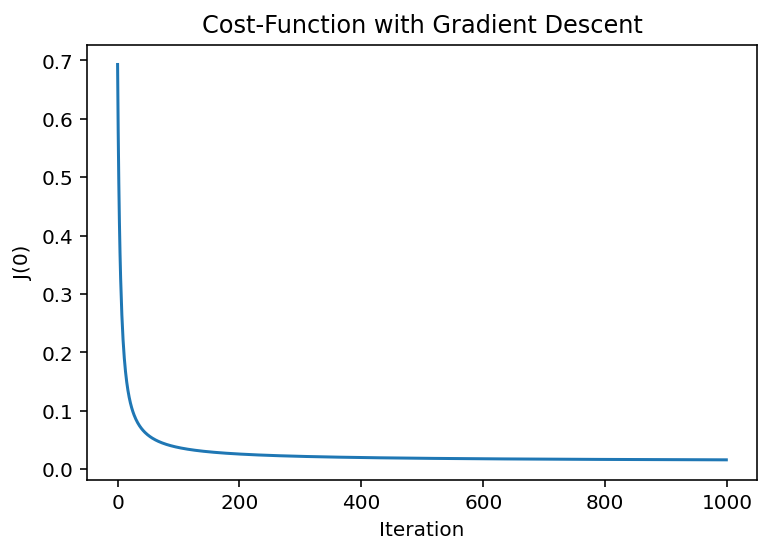

Predicted      0   1    All
Actual                     
0          17235  16  17251
1             86  47    133
All        17321  63  17384
 

	  Precision 	 Recall 	 F1 
Class 0:  0.9991 	 0.9950 	 0.9970
Class 1:  0.3534 	 0.7460 	 0.4796

Accuracy: 0.9941


In [27]:
feature_set_3 = ["price", "view", "zipcode", "grade", "bedrooms", "bathrooms", "sqft_living","sqft_lot",  "sqft_above", "sqft_basement"]

selected_feature_set = feature_set_3

df_task4_train = pd.read_csv("./house_train_data.csv")

x_train = df_task4_train[selected_feature_set]
y_train = df_task4_train["waterfront"]

print(f"Amound of train data: {len(y_train)} \n")

print("Waterfront Y_Train\n")
print(y_train.value_counts())

print("\nWaterfront X_Train")
x_train.head()

x_train = np.column_stack([x_train.iloc[:, i] for i in range(0, x_train.shape[1])])
y_train = np.array(y_train)
y_train = y_train.reshape(-1,1)

x_train, X_mean, X_std = feature_normalization(x_train)

m, n = x_train.shape

x_train = np.append(np.ones((m,1)), x_train ,axis=1) # x = np.insert(X, 0, 1, axis=1)

init_theta = np.zeros((n+1,1))

# ----- Test Variable
df_task4_test = pd.read_csv("./house_test_data.csv")

x_test = df_task4_test[selected_feature_set]
y_test = df_task4_test["waterfront"]

print(f"Amound of test data: {len(y_test)} \n")

print("Waterfront Y_Test\n")
print(y_test.value_counts())

print("\nWaterfront X_Test")
x_test.head()
x_test = np.column_stack([x_test.iloc[:, i] for i in range(0, x_test.shape[1])])
 
y_test = np.array(y_test)
y_test = y_test.reshape(-1,1)

print(x_test.shape, y_test.shape)


x_test, X_mean, X_std = feature_normalization(x_test)
   

theta, J_history = gradient_descent(x_train, y_train, init_theta, 0.5 , 1000, 0.1 )

plot_cost_history(J_history)
    
predicted = prediction(theta, x_train)

matrix = confusion_matrix_binary(y_train[:,0], predicted[:,0])
print(" ")
metrics = calculate_metrics(matrix)
print_metrics(metrics)


## Task5

In [28]:
datapoints = 300

mu1        = [-4.0 , 1.0]
sigma1     = [ 1.2 , 0.8]
x1, label1 = generate_dataset(mu1, sigma1, datapoints, 0)


mu2        = [2.0 , 3.0]
sigma2     = [0.7 , 1.0]
x2, label2 = generate_dataset(mu2, sigma2, datapoints, 1)

mu3        = [-2.0 , 6.0]
sigma3     = [0.7 , 1.0]
x3, label3 = generate_dataset(mu3, sigma3, datapoints, 2)

mu4        = [0.2 , -2.3]
sigma4     = [0.7 , 0.5]
x4, label4 = generate_dataset(mu4, sigma4, datapoints, 3)

X      = np.concatenate((x1, x2, x3, x4), axis=0)
labels = np.concatenate((label1, label2, label3, label4), axis=0)
print(X.shape, labels.shape)

d = {"x1": X[:,0], "x2": X[:,1], "label": labels}
df = pd.DataFrame(data=d)
df

(1200, 2) (1200,)


x1        x2  label
0    -5.047895  1.830225      0
1    -3.966195  1.345484      0
2    -2.019910  0.719035      0
3    -4.702048  1.361036      0
4    -3.860827  1.960815      0
...        ...       ...    ...
1195  1.306664 -1.543445      3
1196 -0.554000 -2.209443      3
1197  0.121758 -2.492539      3
1198  0.220632 -2.882762      3
1199  0.804237 -2.061025      3

[1200 rows x 3 columns]

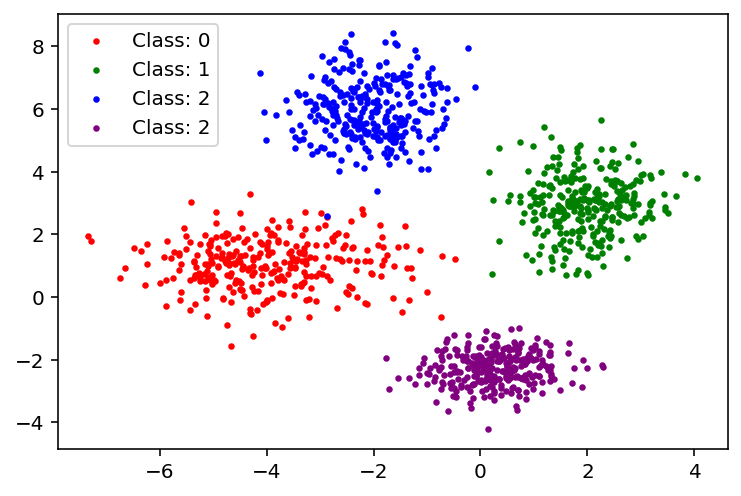

In [29]:
plt.scatter(df.x1[df.label == 0], df.x2[df.label == 0], color = "red", label="Class: 0", s=5) 
plt.scatter(df.x1[df.label == 1], df.x2[df.label == 1], color = "green", label="Class: 1", s=5) 
plt.scatter(df.x1[df.label == 2], df.x2[df.label == 2], color = "blue", label="Class: 2", s=5) 
plt.scatter(df.x1[df.label == 3], df.x2[df.label == 3], color = "purple", label="Class: 2", s=5) 

plt.legend()
plt.show() 

In [30]:
X  = df.drop("label", axis=1)
X  = X.to_numpy()
print(X.shape)


X, X_mean, X_std = feature_normalization(X)
X

(1200, 2)


array([[-1.69744537, -0.02315981],
       [-1.24891148, -0.1796986 ],
       [-0.44187248, -0.38199967],
       ...,
       [ 0.44618348, -1.41912326],
       [ 0.48718194, -1.54513901],
       [ 0.7291774 , -1.27977311]])

In [31]:
def oneVsAll(x, y, lr=0.1 , max_iter=400, lambd = 1):
    x = np.insert(x, 0, 1, axis=1)
    thetas = []

    classes = np.unique(y)

    for c in classes:
        # one vs. rest binary classification
        binary_y = np.where(y == c, 1, 0)
        binary_y = binary_y.reshape(-1,1)
        init_theta = np.zeros((x.shape[1],1))

        theta, J_history = gradient_descent(x, binary_y, init_theta, lr , max_iter, lambd )
    
        thetas.append(theta)
        
    return thetas, classes, J_history

In [32]:
thetas, classes, cost_history = oneVsAll(X, labels)
print(thetas)

[array([[-2.01479435],
       [-2.78715083],
       [-0.98464128]]), array([[-2.18011691],
       [ 2.93943578],
       [ 1.01681229]]), array([[-2.27339618],
       [-0.76079456],
       [ 2.93032833]]), array([[-2.31471369],
       [ 0.77511301],
       [-2.95835555]])]


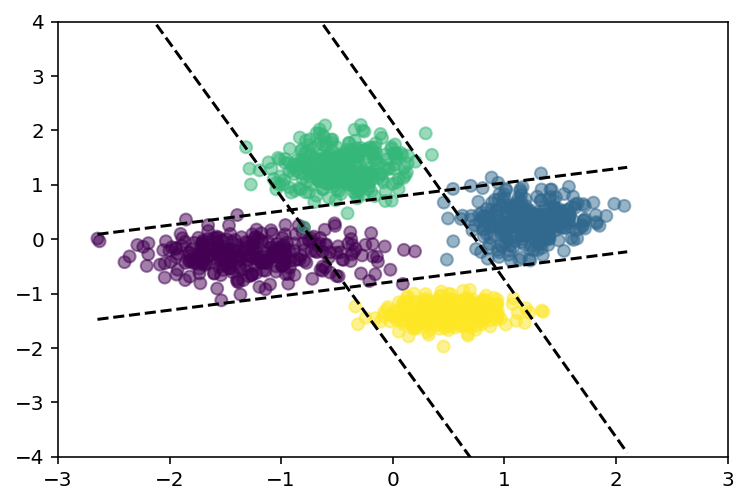

In [33]:
plt.scatter(X[:,0], X[:, 1], c=labels, alpha=0.5)
for theta in [thetas[0],thetas[1], thetas[2], thetas[3]]:
    #print(theta)
    j = np.array([X[:, 0].min(), X[:, 1].max()])
    k = -(j * theta[1] + theta[0]) / theta[2]
    plt.xlim([-3, 3])
    plt.ylim([-4, 4])
    plt.plot(j, k, color='k', linestyle="--")

In [34]:
def predict_classes(classes, thetas, x):
    x = np.insert(x, 0, 1, axis=1)
    preds = [np.argmax( [sigmoid(xi @ theta) for theta in thetas]) for xi in x]
    return [classes[p] for p in preds]

In [35]:
def score(classes, theta, x, y):
    return (predict_classes(classes, theta, x) == y).mean()

print(f"Train Accuracy: {score(classes, thetas, X, labels):.3f}")


Train Accuracy: 0.993
